# Implementing stochastic gradient descent in pytorch

Let's say we have the polynomial

$$y = k_1 x^2 + k_2 x + k_3$$

and we want to fit the curve to some dataset $\{\hat{y}_i, \hat{x}_i\}$ for data instances $i=1,...,n$. Let's do it using stochastic gradient descent, where we make an initial guess for the parameters $k_1, k_2, k_3$, and then update those parameters such that we minimize a loss function. In this case, we can use mean squared error

$$L(y, \hat{y}) = \frac{1}{n} \sum_i^n (y_i - \hat{y}_i)^2.$$

I'll implement this in pytorch.

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
n = 100

Let's write the equation for $\hat{y}$ as

$$\hat{y}_i = \begin{bmatrix}
           k_1 \\
           k_2 \\           
           k_3
         \end{bmatrix} \cdot 
         \begin{bmatrix}
           x_i^2 \\
           x_i \\           
           1
         \end{bmatrix}
$$

we can write this for all data as

$$ \vec{\hat{y}} = \hat{X} \vec{k}$$

where $\hat{X}$ is an $(n \times 3)$ matrix and $\vec{k}$ is a $(3\times 1)$ vector.

In [3]:
X = torch.ones(n,3)
X[:,1].uniform_(-1.,1.)
X[:,0] = X[:,1]*X[:,1]
X[:5]

tensor([[ 0.2245,  0.4739,  1.0000],
        [ 0.6016,  0.7756,  1.0000],
        [ 0.0167,  0.1294,  1.0000],
        [ 0.0926, -0.3044,  1.0000],
        [ 0.5387,  0.7340,  1.0000]])

In [4]:
k = torch.tensor((3.,2,1)); k

tensor([3., 2., 1.])

Compute our data

In [5]:
y = X@k + 0.25*torch.randn(n)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


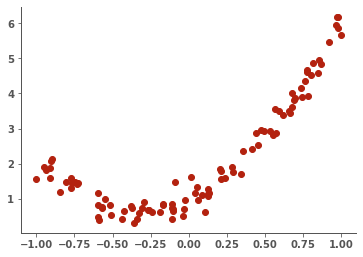

In [6]:
plt.scatter(X[:,1], y);

Let's make an initial guess for `k=(0,0,-1)`

In [8]:
k = torch.tensor((0.,0,-1))

In [9]:
y_hat = X@k

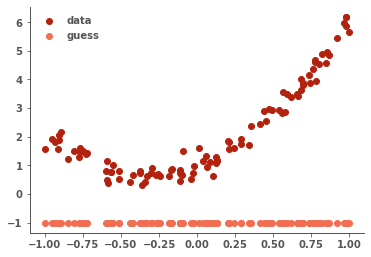

In [12]:
plt.scatter(X[:,1], y, label='data')
plt.scatter(X[:,1], y_hat, label='guess')
plt.legend();

## Gradient descent

We update $\vec{k}$ by iteratively adding on a vector which opposes the gradient of the loss function

$$\vec{k} \rightarrow \vec{k} - \alpha \nabla_k(L(\vec{y}, \vec{\hat{y}}))$$

where $\alpha$ is the learning rate.

In [13]:
k = torch.nn.Parameter(k); k

Parameter containing:
tensor([ 0.,  0., -1.], requires_grad=True)

Define the loss function and update steps

In [7]:
def mse(y_hat, y): return ((y_hat - y)**2).mean()

In [17]:
def update():
    y_hat = X@k
    loss = mse(y_hat, y)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        k.sub_(lr * k.grad)
        k.grad.zero_()

In [15]:
lr = 1e-1

In [18]:
for t in range(100): update()

tensor(12.3977, grad_fn=<MeanBackward0>)
tensor(0.6112, grad_fn=<MeanBackward0>)
tensor(0.3077, grad_fn=<MeanBackward0>)
tensor(0.2068, grad_fn=<MeanBackward0>)
tensor(0.1576, grad_fn=<MeanBackward0>)
tensor(0.1279, grad_fn=<MeanBackward0>)
tensor(0.1081, grad_fn=<MeanBackward0>)
tensor(0.0942, grad_fn=<MeanBackward0>)
tensor(0.0844, grad_fn=<MeanBackward0>)
tensor(0.0774, grad_fn=<MeanBackward0>)


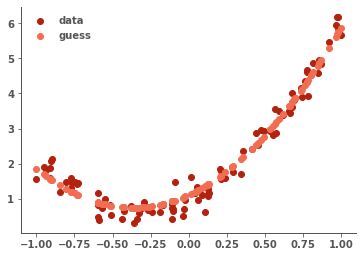

In [20]:
plt.scatter(X[:,1], y, label='data')
plt.scatter(X[:,1], X@k.detach(), label='guess')
plt.legend();

### Animate it!

In [26]:
from matplotlib import animation, rc
import numpy as np
rc('animation', html='jshtml')

In [31]:
k = torch.nn.Parameter(torch.tensor((0.,0,-1)))

fig, ax = plt.subplots(1,1)
ax.scatter(X[:,1], y, c='orange')
line = plt.plot(X[:,1], X@k.detach(), '.k')[0]
plt.close()

def animate(i):
    update()
    line.set_ydata(X@k.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

Beautiful!